In [62]:
import pandas as pd
df1 = pd.read_csv('joshua_shared_decision_data/SharedDecision_DATA_2020-03-05_0700.csv')
df2 = pd.read_csv('joshua_shared_decision_data/SharedDecisionmaking_DATA_2019-08-22_0941.csv')
pd.to_numeric(df1['record_id'])
pd.to_numeric(df2['record_id'])

df1['record_id']= df1['record_id'] + 1000

df3 = pd.concat([df1,df2])
df4 = df3[['video1_reaction', 'video_2reaction', 'video3_reaction', 'video4_reaction', 'overall_reaction1']]

value_counts = df4.apply(pd.Series.value_counts)
value_counts.rename(columns={ 'overall_reaction1': 'Overall satisfaction with videos','video1_reaction': 'Satisfaction -Video1',
                     'video_2reaction': 'Satisfaction -Video2', 'video3_reaction': 'Satisfaction -Video3',
                     'video4_reaction': 'Satisfaction -Video4'} , inplace=True)
vals = pd.DataFrame.transpose(value_counts)
vals['response'] = vals.index
vals.head()
vals.keys()

Index([1.0, 2.0, 3.0, 5.0, 'response'], dtype='object')

In [63]:
import plotly.graph_objects as go


fig = go.Figure(data=[
    go.Bar(name='Very Satisfied', x=vals['response'].values, y=vals[1.0]),
    go.Bar(name='Slightly Satisfied', x=vals['response'].values, y=vals[2.0]),
    go.Bar(name='Neutral', x=vals['response'].values, y=vals[3.0]),
    go.Bar(name='Very Unsatisfied', x=vals['response'].values, y=vals[5.0])
])
fig.update_layout(barmode='stack')
fig.write_html('ml.html', auto_open=True)


In [ ]:
print(len(df1), ' ',len(df2), ' ',len(df3))
df3.rename(columns={ 'overall_reaction3': 'Allay concerns', 'overall_reaction4':   'Decisionmaking ability during consult',
                    'overall_reaction5': 'Chances of following treatment', 'overall_reaction6': 'Importance of individual Dr recording video',
                    'overall_reaction1': 'Overall satisfaction with videos','video1_reaction': 'Satisfaction -Video1',
                     'video_2reaction': 'Satisfaction -Video2', 'video3_reaction': 'Satisfaction -Video3',
                     'video4_reaction': 'Satisfaction -Video4'} , inplace=True)



vas_data = pd.melt(df3,id_vars='record_id', value_vars=['Decisionmaking ability during consult', 'Allay concerns', 
                                                       'Chances of following treatment', 'Importance of individual Dr recording video'])

vas_data.rename(columns={'value':'Visual analogue scale',  'variable':'Effect of video module on:'}, inplace=True)

vas_data.head()


In [5]:
import plotly.express as px
# Use directly Columns as argument. You can use tab completion for this!
fig = px.violin(vas_data,y='Visual analogue scale', points='all', x='Effect of video module on:', box=True, )


fig.update_layout(
    title="Shared decision making visual analogue scale",

    font=dict(
        family="Courier New, monospace",
        size=14,
        color="#7f7f7f")6
    )

fig.write_html('shared decionmaking VAS violin.html', auto_open=True)

In [19]:
#Need to formulate a table with just the satisfactory variables
df4 = df3.loc[:,['Overall satisfaction with videos','Satisfaction -Video1',
                     'Satisfaction -Video2', 'Satisfaction -Video3',
                      'Satisfaction -Video4']]


KeyError: 'Passing list-likes to .loc or [] with any missing labels is no longer supported, see https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike'

In [9]:
import plotly.graph_objects as go

fig = go.Figure(data=[
    go.Bar(name='Satisfaction -Video1',y=df3['Satisfaction -Video1'].value_counts()) 
])
fig.update_layout(barmode='stack')
fig.write_html('stacked bar.html', auto_open=True)



In [ ]:
import dash
import dash_core_components as dcc
import dash_html_components as html

app = dash.Dash()
app.layout = html.Div([
    dcc.Graph(figure=fig)
])

app.run_server(debug=True, use_reloader=False)  # Turn off reloader if inside Jupyter

In [35]:
import plotly.express as px
# Use directly Columns as argument. You can use tab completion for this!
fig = px.violin(df4,y='value', color='variable', box=True)
fig.write_html('RACC_height_waist_sex.html', auto_open=True)


In [28]:
import plotly.express as px
# Use directly Columns as argument. You can use tab completion for this!
fig = px.violin(df3,y='overall_reaction2')
fig.write_html('RACC_height_waist_sex.html', auto_open=True)



In [ ]:
import phonenumbers
from phonenumbers import timezone

oz_nbr = phonenumbers.parse('+61403019234', None)
print(oz_nbr)
print(timezone.time_zones_for_number(oz_nbr))

us= phonenumbers.parse('‭+16103292964‬', None)
print(timezone.time_zones_for_number(us))


In [1]:
from redcap import Project, RedcapError
import configparser




config = configparser.ConfigParser()
config.read('/Users/aravindathiagalingam/Library/Mobile Documents/com~apple~CloudDocs/Documents/My Documents/PycharmProjects/redcap_format/redcap_project_configs.ini')
rc_keys = dict(config['wm_racc_new'])
rc_stats_keys = dict(config['wm_racc_stats'])

# Get list of variables to download
variables = 'sex, age, referral_date, clinic_date, indication, indigenous_status, ç, diabetes_type, ' \
            'diabetes_treatment, hypertension, hypertension_treatment, hyperlipidaemia, hyperlipidaemia_treatment, ' \
            'known_ihd, ihd_events, ihd_details, ihd_fx, ihd_fhx_prem, crf, dialysis, smoking, pack_years,' \
            ' comorbidities, lvef_cat, exercise_time, etoh, etoh_days, etoh_drinks, bp_sys, bp_dias, heart_rate, ' \
            'weight, height, bmi, waist, ecg_rhythm, ecg_ischaemia, ecg_comment, cvdrisk_10yr, hrs_e, hrs_t, hrs_total,' \
            ' type_ix_initial, patient_outcome, final_dx_cp, final_dx_asx, reg_meds, aspirin, antiplatelet, ' \
            'beta_blocker, ace, arb, statin, statin_changes, statin_dose_freq, statin_tdd, other_chol, type_other_chol,' \
            ' ccb, loop, thiazide, aldosterone, anticoag, type_anticoag, nitrates, gtn, anti_anginal, type_antianginal,' \
            ' other_antihyper, type_other_antihyper, type_arrhythmics, oral_hypo, insulin, hypo_med1, creatinine, ' \
            'gfr, glu_rand, gluc_fast, hba1c,  total_chol, ldl, hdl, trig, followup_date, fu_ix, type_ix, est_time,' \
            ' est_hr, est_percent, est_maxsbp, est_stop, est_mets, est_result, est_report, ctca_date, ctca_cascore, ' \
            'ctca_result, stress_date, stress_time, stress_hr, stress_percent, stress_maxsbp, stress_stop, stress_mets,' \
            ' stress_result, mibi_scan, mibi_result, mibi_lvef_pre, abpm_date, awake_no, awake_sys_mean, ' \
            'awake_sys_percent, awake_dias_mean, awake_dias_percent, asleep_no, asleep_sys_mean, asleep_sys_percent, ' \
            'asleep_dias_mean, asleep_dias_percent, angio_date, angio_result, vessel_50stenosis, pci, angio_report, fu_final_dx_cp'

variables_list = variables.split(',')


In [ ]:
from redcap import Project, RedcapError
import configparser




config = configparser.ConfigParser()
config.read('/Users/aravindathiagalingam/Library/Mobile Documents/com~apple~CloudDocs/Documents/My Documents/PycharmProjects/redcap_format/redcap_project_configs.ini')
rc_keys = dict(config['wm_racc_new'])
rc_stats_keys = dict(config['wm_racc_stats'])

# Get list of variables to download

variables_list = variables.split(',')


In [ ]:
rc_project = Project(rc_keys['url'], rc_keys['racc_token'])
rc_data_index = rc_project.export_records(fields=variables_list, raw_or_label='label', event_name='unique', export_checkbox_labels=True)

In [3]:
import pandas as pd
rc = pd.DataFrame(rc_data_index)

In [64]:
'bmi' in rc.keys()

True

In [4]:


numeric_list=['weight', 'height', 'waist', 'hrs_total', 'bmi']
for field in numeric_list:
    rc[field] = pd.to_numeric(rc[field])

date_list=['clinic_date', 'followup_date','referral_date'  ]
for field in date_list:
    rc[field] = pd.to_datetime(rc[field], format='%Y-%m-%d')


    rc['arm'] = rc.redcap_event_name.replace(to_replace={'Initial visit (Arm 1: Chest pain)': 'Chest pain',
                               'Initial visit (Arm 2: Heart failure)': 'Heart failure',
                               'Initial visit (Arm 3: Pre-operative assessment)': 'PreOp',
                               'Initial visit (Arm 4: Arrhythmia)': 'Arrhythmia',
                               'Initial visit (Arm 5: Other)': 'Other' }, value=None)

    rc['arm'] = rc.arm.replace(to_replace={'Follow.*Arm 1.*': 'F_Chest pain',
                               'Follow.*Arm 2.*': 'F_HF',
                               'Follow.*Arm 3.*': 'F_PreOp',
                               'Follow.*Arm 4.*': 'F_Arrhythmia',
                               'Follow.*Arm 5.*': 'F_Other' }, regex=True)
rc_new = rc.loc[(rc['arm'] == 'Chest pain') | (rc['arm'] == 'Heart failure') | (rc['arm'] == 'PreOp') |
                (rc['arm'] == 'Arrhythmia') | (rc['arm'] == 'Other') ]
rc['weight'].describe()
rc_new['weight'].describe()

pd.DataFrame.to_csv(rc_new,'racc_new2.csv')
pd.DataFrame.to_excel(rc_new,'racc_new2.xls')

In [11]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.figure()
rc_new.plot.scatter(y='weight', x='height', c = 'waist', colormap='seismic')

In [5]:
import plotly.express as px

# Use directly Columns as argument. You can use tab completion for this!
fig = px.scatter(rc_new, x=rc_new.weight, y=rc_new.height, color=rc_new.waist, hover_name=rc_new.record_id, 
                 color_continuous_scale=px.colors.sequential.Hot)
fig.write_html('RACC_weight_height.html', auto_open=True)

In [36]:
import plotly.express as px

# Use directly Columns as argument. You can use tab completion for this!
fig = px.scatter(rc_new, x=rc_new.waist, y=rc_new.height, color=rc_new.weight, hover_name=rc_new.record_id, 
                 color_continuous_scale=px.colors.sequential.Hot)
fig.write_html('RACC_height_waist.html', auto_open=True)

In [76]:
import plotly.express as px
import statsmodels
df = px.data.iris()
# Use directly Columns as argument. You can use tab completion for this!
fig = px.scatter(rc_new, x=rc_new.bmi, trendline='lowess', opacity=0.7, y=rc_new.waist, color=rc_new.diabetes_type, hover_name=rc_new.record_id, 
                 color_continuous_scale=px.colors.sequential.Hot, marginal_y="violin", marginal_x="violin",
                 trendline_color_override='black')
fig.write_html('RACC_height_weight_sex.html', auto_open=True)

In [56]:
import plotly.express as px
df = px.data.iris()
# Use directly Columns as argument. You can use tab completion for this!
fig = px.scatter(rc_new, x=rc_new.waist, y=rc_new.height, color=rc_new.sex, hover_name=rc_new.record_id, 
                 color_continuous_scale=px.colors.sequential.Hot, marginal_y="violin", marginal_x="violin")
fig.write_html('RACC_height_waist_sex.html', auto_open=True)

In [86]:
fig = px.violin(rc_new, x='sex', y=rc_new.bmi,  box=True, points="all" )
fig.write_html('RACC_height_waist_sex.html', auto_open=True)

In [26]:
import plotly.graph_objects as go
fig = go.Figure(data=go.Bar(y=[2, 3, 1]))
fig.write_html('first_figure.html', auto_open=True)

In [ ]:
import dash
import dash_core_components as dcc
import dash_html_components as html

external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

app = dash.Dash(__name__, external_stylesheets=external_stylesheets)

app.layout = html.Div(children=[
    html.H1(children='Hello Dash'),

    html.Div(children='''
        Dash: A web application framework for Python.
    '''),

    dcc.Graph(
        id='example-graph',
        figure={
            'data': [
                {'x': [1, 2, 3], 'y': [4, 1, 2], 'type': 'bar', 'name': 'SF'},
                {'x': [1, 2, 3], 'y': [2, 4, 5], 'type': 'bar', 'name': u'Montréal'},
            ],
            'layout': {
                'title': 'Dash Data Visualization'
            }
        }
    )
])

if __name__ == '__main__':
    app.run_server(debug=True)
    

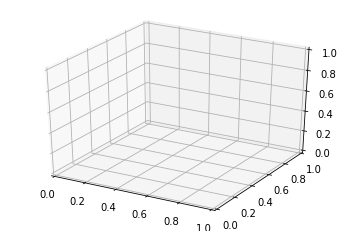

In [3]:
from mpl_toolkits import mplot3d

import numpy as np

import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.axes(projection="3d")

plt.show()

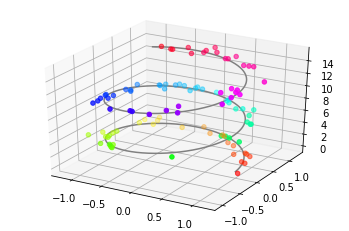

In [4]:
fig = plt.figure()
ax = plt.axes(projection="3d")

z_line = np.linspace(0, 15, 1000)
x_line = np.cos(z_line)
y_line = np.sin(z_line)
ax.plot3D(x_line, y_line, z_line, 'gray')

z_points = 15 * np.random.random(100)
x_points = np.cos(z_points) + 0.1 * np.random.randn(100)
y_points = np.sin(z_points) + 0.1 * np.random.randn(100)
ax.scatter3D(x_points, y_points, z_points, c=z_points, cmap='hsv');

plt.show()

In [7]:
a=np.array([1,2,3])

In [33]:
from stl import mesh
import stl
la_mesh = mesh.Mesh.from_file('Control1.stl')
points = la_mesh.points
la_mesh.save('la.stl', mode=stl.Mode.ASCII)

In [2]:
from scipy.spatial import ConvexHull
import numpy
import scipy.spatial as sp
f= open('la.stl', 'r') #Note that the stl file needs to be saved as ASCCII not binary


#extract the list of 3d vertices from the stl file (they are on the lines starting with 'vertex')
vertex_point_list =[]
for line in f.readlines():
    line = line.lstrip().rstrip()
    if line.startswith('vertex'):
        vertex_point_list.append(line[7:].split(' '))
f.close()

hull = ConvexHull(vertex_point_list)
sphericity_index = numpy.pi**(1/3)*((6*hull.volume)**(2/3))/hull.area
print('volume = %scm^2 area = %sml sphericity index =%s'%(hull.volume/1000,hull.area/100, sphericity_index) )



volume = 34.220367969869585cm^2 area = 55.82398116967232ml sphericity index =0.9131029986075248


In [48]:
#determinant of matrix a
def det(a):
    return a[0][0]*a[1][1]*a[2][2] + a[0][1]*a[1][2]*a[2][0] + a[0][2]*a[1][0]*a[2][1] - a[0][2]*a[1][1]*a[2][0] - a[0][1]*a[1][0]*a[2][2] - a[0][0]*a[1][2]*a[2][1]

#unit normal vector of plane defined by points a, b, and c
def unit_normal(a, b, c):
    x = det([[1,a[1],a[2]],
             [1,b[1],b[2]],
             [1,c[1],c[2]]])
    y = det([[a[0],1,a[2]],
             [b[0],1,b[2]],
             [c[0],1,c[2]]])
    z = det([[a[0],a[1],1],
             [b[0],b[1],1],
             [c[0],c[1],1]])
    magnitude = (x**2 + y**2 + z**2)**.5
    return (x/magnitude, y/magnitude, z/magnitude)

#dot product of vectors a and b
def dot(a, b):
    return a[0]*b[0] + a[1]*b[1] + a[2]*b[2]

#cross product of vectors a and b
def cross(a, b):
    x = a[1] * b[2] - a[2] * b[1]
    y = a[2] * b[0] - a[0] * b[2]
    z = a[0] * b[1] - a[1] * b[0]
    return (x, y, z)

#area of polygon poly
def area(poly):
    if len(poly) < 3: # not a plane - no area
        return 0

    total = [0, 0, 0]
    for i in range(len(poly)):
        vi1 = poly[i]
        if i is len(poly)-1:
            vi2 = poly[0]
        else:
            vi2 = poly[i+1]
        prod = cross(vi1, vi2)
        total[0] += prod[0]
        total[1] += prod[1]
        total[2] += prod[2]
    result = dot(total, unit_normal(poly[0], poly[1], poly[2]))
    return abs(result/2)

for item in hull.simplices:
    points = [hull.points[item[0]],hull.points[item[1]],hull.points[item[2]] ]
    #print('\nPoints= ',points[0])
    tri_area = area([points[0], points[1], points[2]])
    print(tri_area)

14.598209658136096
20.000856734975002
2.022827015023143
18.077306730049916
21.64120547082996
29.478999749125602
34.02950496021674
24.437936829829606
162.49853840552487
30.06819678794822
35.51806995483188
5.225957344406678
4.814619663118114
5.1355532751017865
5.1574974484993295
22.964252009552336
16.970644477393545
6.108382384649908
6.207051397487255
5.436270045864541
5.772643223642352
6.086118518894707
5.869454514454184
6.475471725991383
5.377905744669315
5.455121075692849
5.650619744172741
29.619704729986562
32.99606692427072
5.776968172097351
5.324978100764291
6.809190507440486
3.8858807029778073
1.4167526022788062
8.127583741182516
5.59066918894833
18.33356912583161
6.956451027701755
5.670917993709692
16.85473494255136
6.29362185447877
6.426309576608443
4.689476411428252
6.295945080170413
6.124888599177472
4.886039587752299
5.392801311935516
19.375046058891535
15.675277269007298
22.809131166990515
21.246449855065197
6.184559702327884
5.8927422384752886
5.664794406922272
5.8416834091

In [4]:
from mpl_toolkits import mplot3d
%matplotlib
    
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')
xs=[item[0] for item in hull.points]
ys=[item[1] for item in hull.points]
zs=[item[2] for item in hull.points]
ax.scatter(xs,ys,zs, 'gray')



Using matplotlib backend: MacOSX


NameError: name 'hull' is not defined

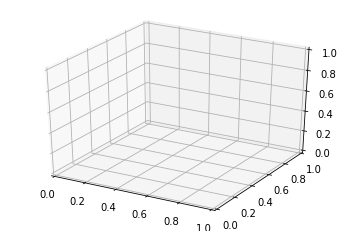

In [1]:
from matplotlib.pyplot import subplots
from mpl_toolkits.mplot3d import Axes3D
fig, ax = subplots(subplot_kw = dict(projection = '3d'))
ax.plot_trisurf(*hull.points.T, triangles = hull.simplices.T)
fig.show()


In [7]:
from stl import mesh
import math
import numpy

# Create 3 faces of a cube
data = numpy.zeros(6, dtype=mesh.Mesh.dtype)

# Top of the cube
data['vectors'][0] = numpy.array([[0, 1, 1],
                                  [1, 0, 1],
                                  [0, 0, 1]])
data['vectors'][1] = numpy.array([[1, 0, 1],
                                  [0, 1, 1],
                                  [1, 1, 1]])
# Front face
data['vectors'][2] = numpy.array([[1, 0, 0],
                                  [1, 0, 1],
                                  [1, 1, 0]])
data['vectors'][3] = numpy.array([[1, 1, 1],
                                  [1, 0, 1],
                                  [1, 1, 0]])
# Left face
data['vectors'][4] = numpy.array([[0, 0, 0],
                                  [1, 0, 0],
                                  [1, 0, 1]])
data['vectors'][5] = numpy.array([[0, 0, 0],
                                  [0, 0, 1],
                                  [1, 0, 1]])
# Since the cube faces are from 0 to 1 we can move it to the middle by
# substracting .5
data['vectors'] -= .5

# Generate 4 different meshes so we can rotate them later
meshes = [mesh.Mesh(data.copy()) for _ in range(4)]
p1=meshes[0].points

In [8]:
import numpy as np
points = np.random.rand(30, 2)